In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv("D:/Personal/indix/train.csv")
test = pd.read_csv("D:/Personal/indix/evaluation.csv")

In [3]:
train.head()

,storeId,url,additionalAttributes,breadcrumbs,label
0,23,http://www.walmart.com/ip/best-of-toto%3A-pian...,Contributed by=Toto;Format=Paperback;Number of...,books > art music & photography > music,books
1,NaN,NaN,NaN,best buy > computers & tablets > computer card...,rest
2,23,https://www.walmart.com/ip/34441317,Performer=Cult Of Youth;Record Label=Vinyl;1.=...,music on cd or vinyl > rock music on cd or vin...,music
3,26,https://www.overstock.com/Books-Movies-Music-G...,Format=Paperback;Copyright Year=2000;Publisher...,books & media > books > cooking & food books >...,books
4,22,http://www.target.com/p/amore-version-ii/-/A-1...,Store Item Number (DPCI)=244-48-2721;Origin=Ma...,"target > movies, music & books > music > class...",music


train.head()

# Data View / summary

In [4]:
train.shape

(603201, 5)

In [5]:
test.shape

(442041, 5)

In [6]:
train.describe()

,storeId,url,additionalAttributes,breadcrumbs,label
count,213951,213951,213951,599800,603201
unique,166,201510,199742,63126,4
top,22,https://www.walmart.com/ip/At-Home-Bonus-Track...,Country of Origin=United States,books,rest
freq,48000,6,405,16039,389250


In [7]:
## checking the nan value in data set- trian
train.isnull().any()

storeId                  True
url                      True
additionalAttributes     True
breadcrumbs              True
label                   False
dtype: bool

In [8]:
## Checking the duplicate values in ['breadcrumbs', 'lebel']
train.duplicated().any()

True

### Data Cleaning- making structure data for model prediction
By doing this the change of overfitting will be reduced.

In [9]:
## Drop all Na values- As will train baise the model
train_struct_df = train.dropna()

In [10]:
## cross checkig for na values in train data set
train_struct_df.isnull().any()

storeId                 False
url                     False
additionalAttributes    False
breadcrumbs             False
label                   False
dtype: bool

In [11]:
train.shape

(603201, 5)

The original data has sahpe (603201, 5) and after removing the Null from all columns the size has been reduced to 66%.
So need to romve the only columns null values which are going to be used as the train features.

In [12]:
train_struct_df = train.dropna(subset = ['breadcrumbs', 'label'])

In [13]:
train_struct_df.shape

(599800, 5)

In [14]:
## Removing duplicate in the columns ['breadcrumbs', 'label']
train_struct_df.duplicated().any()

True

In [15]:
train_struct_df = train_struct_df.drop_duplicates(subset = ['breadcrumbs', 'label'])

In [16]:
train_struct_df.shape

(63126, 5)

So after removal of <NULL> and Duplicate- we have 63126 unique entries for 'train' data

In [17]:
## Seperating the 'breadcrumbs' column into different columns
train_struct_df.head()

,storeId,url,additionalAttributes,breadcrumbs,label
0,23,http://www.walmart.com/ip/best-of-toto%3A-pian...,Contributed by=Toto;Format=Paperback;Number of...,books > art music & photography > music,books
1,NaN,NaN,NaN,best buy > computers & tablets > computer card...,rest
2,23,https://www.walmart.com/ip/34441317,Performer=Cult Of Youth;Record Label=Vinyl;1.=...,music on cd or vinyl > rock music on cd or vin...,music
3,26,https://www.overstock.com/Books-Movies-Music-G...,Format=Paperback;Copyright Year=2000;Publisher...,books & media > books > cooking & food books >...,books
4,22,http://www.target.com/p/amore-version-ii/-/A-1...,Store Item Number (DPCI)=244-48-2721;Origin=Ma...,"target > movies, music & books > music > class...",music


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
count_vect = CountVectorizer()

In [20]:
X_train_counts = count_vect.fit_transform(train_struct_df.breadcrumbs.values.astype('U'))

In [21]:
X_train_counts.shape

(63126, 18287)

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
tfidf_transformer = TfidfTransformer()

In [24]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [25]:
X_train_tfidf.shape

(63126, 18287)

## Running ML Algorithm

### Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
clf = MultinomialNB().fit(X_train_tfidf, train_struct_df.label)

#### Building a Pipeline: To reduce the Code size

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])

In [30]:
text_clf = text_clf.fit(train_struct_df.breadcrumbs, train_struct_df.label)

### 1. Performance of  NB Classifier

In [31]:
import numpy as np

In [32]:
test.head()

,storeId,url,additionalAttributes,breadcrumbs,id
0,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,8589934592
1,NaN,NaN,NaN,online shopping > home & garden > art gal...,8589934593
2,NaN,NaN,NaN,home goods > kitchen & dining > table linens &...,8589934594
3,NaN,NaN,NaN,11320,8589934595
4,NaN,NaN,NaN,tools & home improvement > kitchen & bath fixt...,8589934596


In [33]:
test['breadcrumbs'] = test['breadcrumbs'].astype('str')

In [34]:
test_pred = test.drop_duplicates(subset = ['breadcrumbs'])

In [35]:
test.duplicated().any()

False

In [36]:
predicted = text_clf.predict(test.breadcrumbs)

In [37]:
type(predicted)

numpy.ndarray

In [38]:
predicted

array(['rest', 'rest', 'rest', ..., 'rest', 'rest', 'music'], 
      dtype='|S6')

In [39]:
len(predicted)

442041

In [40]:
prd_df = pd.DataFrame(predicted, columns = ['lebel'])

In [41]:
evaluation_prd = pd.concat([test,prd_df], axis=1)

In [42]:
evaluation_prd.to_csv('D:\Personal\indix/evaluation_prd_NB.csv', index=False)

In [43]:
evaluation_prd.head()

,storeId,url,additionalAttributes,breadcrumbs,id,lebel
0,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,8589934592,rest
1,NaN,NaN,NaN,online shopping > home & garden > art gal...,8589934593,rest
2,NaN,NaN,NaN,home goods > kitchen & dining > table linens &...,8589934594,rest
3,NaN,NaN,NaN,11320,8589934595,rest
4,NaN,NaN,NaN,tools & home improvement > kitchen & bath fixt...,8589934596,rest


In [44]:
len(evaluation_prd)

442041

## To check the result accuracy:
### I merged the predicted result and train data set on column Breadcrumbs on each below ML algorithm.

In [45]:
evaluation_train_level = pd.merge(evaluation_prd, train_struct_df, on = 'breadcrumbs')

In [46]:
evaluation_train_level.head()

,storeId_x,url_x,additionalAttributes_x,breadcrumbs,id,lebel,storeId_y,url_y,additionalAttributes_y,label
0,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,8589934592,rest,NaN,NaN,NaN,rest
1,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,807453851709,rest,NaN,NaN,NaN,rest
2,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,1348619732961,rest,NaN,NaN,NaN,rest
3,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,1168231107106,rest,NaN,NaN,NaN,rest
4,NaN,NaN,NaN,online shopping > home & garden > art gal...,8589934593,rest,NaN,NaN,NaN,rest


In [48]:
evaluation_train_level.to_csv('D:\Personal\indix/evaluation_NB.csv', index=False)

In [49]:
np.mean(evaluation_train_level.lebel == evaluation_train_level.label)

0.99508498194192985

In [50]:
len(predicted)

442041

In [51]:
print len(evaluation_train_level.lebel)
print evaluation_train_level.shape

421972
(421972, 10)


In [52]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [53]:
clf_report = classification_report(evaluation_train_level.lebel, evaluation_train_level.label)
print(clf_report)

             precision    recall  f1-score   support

      books       0.99      0.91      0.95     21196
      music       0.97      0.99      0.98     13753
       rest       1.00      1.00      1.00    375105
     videos       0.89      1.00      0.94     11918

avg / total       1.00      1.00      1.00    421972



In [54]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
    plt.show()

[0.99, 0.91, 0.95]
[0.97, 0.99, 0.98]
[1.0, 1.0, 1.0]
[0.89, 1.0, 0.94]


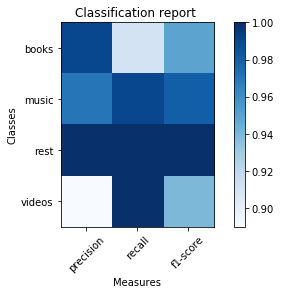

In [55]:
plot_classification_report(clf_report)

#### 2. Support Vector Machines (SVM)

In [56]:
from sklearn.linear_model import SGDClassifier

In [57]:
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, n_iter=5, random_state=42)),])

In [58]:
text_clf_svm= text_clf_svm.fit(train_struct_df.breadcrumbs, train_struct_df.label)

In [59]:
predicted_svm = text_clf_svm.predict(test.breadcrumbs)

In [60]:
prd_svm_df = pd.DataFrame(predicted_svm, columns = ['label_test'])
evaluation_prd_svm = pd.concat([test,prd_svm_df], axis=1)
evaluation_train_level_svm = pd.merge(evaluation_prd_svm, train_struct_df, on = 'breadcrumbs')

In [61]:
evaluation_train_level_svm.head()

,storeId_x,url_x,additionalAttributes_x,breadcrumbs,id,label_test,storeId_y,url_y,additionalAttributes_y,label
0,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,8589934592,rest,NaN,NaN,NaN,rest
1,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,807453851709,rest,NaN,NaN,NaN,rest
2,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,1348619732961,rest,NaN,NaN,NaN,rest
3,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,1168231107106,rest,NaN,NaN,NaN,rest
4,NaN,NaN,NaN,online shopping > home & garden > art gal...,8589934593,rest,NaN,NaN,NaN,rest


In [62]:
np.mean(evaluation_train_level_svm.label_test == evaluation_train_level_svm.label)

0.9634549211796043

In [63]:
clf_report_svm = classification_report(evaluation_train_level_svm.label, evaluation_train_level_svm.label_test)
print clf_report_svm

             precision    recall  f1-score   support

      books       0.56      1.00      0.72     19490
      music       1.00      0.99      1.00     14104
       rest       1.00      0.97      0.98    375045
     videos       1.00      0.82      0.90     13333

avg / total       0.98      0.96      0.97    421972



[0.56, 1.0, 0.72]
[1.0, 0.99, 1.0]
[1.0, 0.97, 0.98]
[1.0, 0.82, 0.9]


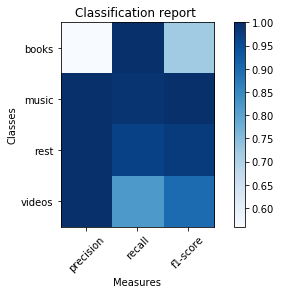

In [64]:
plot_classification_report(clf_report_svm)

In [65]:
evaluation_prd_svm.to_csv('D:\Personal\indix/evaluation_prd_svm.csv', index=False)

#### 3. Grid Search

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
## vect_ngram_range : use unigram and bigram and choose the one
##which is optimal
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3),}

In [68]:
### n_jobs = -1 --> use multiple cores from user machine
### Using text_clf from Naive Bayes
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

In [69]:
gs_clf = gs_clf.fit(train_struct_df.breadcrumbs, train_struct_df.label)

In [70]:
predicted_gs = gs_clf.predict(test.breadcrumbs)

In [71]:
prd_gs_df = pd.DataFrame(predicted_gs, columns = ['label_test'])
evaluation_prd_gs = pd.concat([test,prd_gs_df], axis=1)
evaluation_train_level_gs = pd.merge(evaluation_prd_gs, train_struct_df, on = 'breadcrumbs')

In [72]:
evaluation_train_level_gs.head()

,storeId_x,url_x,additionalAttributes_x,breadcrumbs,id,label_test,storeId_y,url_y,additionalAttributes_y,label
0,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,8589934592,rest,NaN,NaN,NaN,rest
1,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,807453851709,rest,NaN,NaN,NaN,rest
2,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,1348619732961,rest,NaN,NaN,NaN,rest
3,NaN,NaN,NaN,baby products > bathing & skin care > washclot...,1168231107106,rest,NaN,NaN,NaN,rest
4,NaN,NaN,NaN,online shopping > home & garden > art gal...,8589934593,rest,NaN,NaN,NaN,rest


In [73]:
np.mean(evaluation_train_level_gs.label_test == evaluation_train_level_gs.label)

0.99991231645701606

In [74]:
clf_report_gs = classification_report(evaluation_train_level_gs.label, evaluation_train_level_gs.label_test) 
print clf_report_gs

             precision    recall  f1-score   support

      books       1.00      1.00      1.00     19490
      music       1.00      1.00      1.00     14104
       rest       1.00      1.00      1.00    375045
     videos       1.00      1.00      1.00     13333

avg / total       1.00      1.00      1.00    421972



[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]


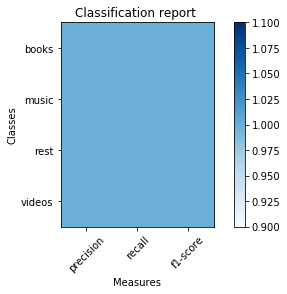

In [75]:
plot_classification_report(clf_report_gs)

In [76]:
evaluation_prd_gs.to_csv('D:\Personal\indix/evaluation_prd_gs.csv', index=False)

#### 4. Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
text_clf_rf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('rf', RandomForestClassifier(n_estimators=500)),])

In [79]:
text_clf_rf = text_clf_rf.fit(train_struct_df.breadcrumbs, train_struct_df.label)

In [80]:
predicted_rf = text_clf_rf.predict(test.breadcrumbs)

In [82]:
prd_rf_df = pd.DataFrame(predicted_rf, columns = ['label_test'])
evaluation_prd_rf = pd.concat([test,prd_rf_df], axis=1)
evaluation_train_level_rf = pd.merge(evaluation_prd_rf, train_struct_df, on = 'breadcrumbs')

In [83]:
np.mean(evaluation_train_level_rf.label == evaluation_train_level_rf.label_test)

1.0

In [87]:
clf_report_rf = classification_report(evaluation_train_level_rf.label, evaluation_train_level_rf.label_test) 
print clf_report_rf

             precision    recall  f1-score   support

      books       1.00      1.00      1.00     19490
      music       1.00      1.00      1.00     14104
       rest       1.00      1.00      1.00    375045
     videos       1.00      1.00      1.00     13333

avg / total       1.00      1.00      1.00    421972



[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]


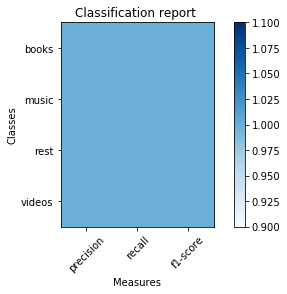

In [88]:
plot_classification_report(clf_report_gs)

In [89]:
evaluation_prd_rf.to_csv('D:\Personal\indix/evaluation_prd_rf.csv', index=False)

## As we can see both  RF and GS are formed well, when we merged with train data set.